In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
#import dataset
dataset_raw = pd.read_csv("./divar_dataset/divar_posts_dataset.csv")
dataset_raw.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [3]:
dataset = dataset_raw[["cat1","cat2","cat3","city"]]
dataset = dataset.dropna()
dataset = dataset.astype(str)
dataset["product"] = dataset['cat2'] +"__"+ dataset['cat3']
dataset = dataset[["product","city"]]

In [4]:
dataset

,product,city
0,furniture-and-home-decore__sofa-armchair,Tehran
1,furniture-and-home-decore__antiques-and-art,Mashhad
2,cars__heavy,Mashhad
3,furniture-and-home-decore__sofa-armchair,Tehran
4,baby-and-toys__personal-toys,Karaj
...,...,...
947630,building-and-garden__stove-and-heating,Shiraz
947631,audio-video__camera-camcoders,Tehran
947632,cars__light,Shiraz
947633,mobile-tablet__mobile-tablet-accessories,Mashhad


In [5]:
grouped = dataset.groupby("city")
groups = []
for name, group in grouped:
#     print("\n"+name.upper()+"\n")
#     print(group['ID_Item'].value_counts())
#     print(len(group['ID_Item'].value_counts()))
    groups.append(group)


In [6]:
combined_groups = groups[0]['product'].value_counts().add(groups[1]['product'].value_counts())
for i in range(2,len(groups)):
    combined_groups = combined_groups.add(groups[i]['product'].value_counts())

    
combined_groups = combined_groups.dropna()
combined_groups

animals__birds                                         38511.0
audio-video__tv-projector                              16118.0
cars__light                                           120451.0
clothing-and-shoes__clothing                           53758.0
clothing-and-shoes__shoes-belt-bag                     33338.0
equipments-and-machinery__industrial                   19985.0
equipments-and-machinery__shop-and-cash                16660.0
furniture-and-home-decore__antiques-and-art            29057.0
furniture-and-home-decore__beds-bedroom                16650.0
furniture-and-home-decore__carpets                     22472.0
furniture-and-home-decore__sofa-armchair               49363.0
furniture-and-home-decore__storage                     27702.0
furniture-and-home-decore__tables-and-chairs           30742.0
furniture-and-home-decore__tv-and-stereo-furniture     13688.0
mobile-tablet__mobile-phones                           62176.0
mobile-tablet__mobile-tablet-accessories               

In [7]:

vectors = []
for name, group in grouped:
    series = group['product'].value_counts()[combined_groups.keys()]
    series.name = name
    vectors.append(series)

In [8]:
clean_data = pd.concat(vectors, axis=1).transpose()
clean_data

,animals__birds,audio-video__tv-projector,cars__light,clothing-and-shoes__clothing,clothing-and-shoes__shoes-belt-bag,equipments-and-machinery__industrial,equipments-and-machinery__shop-and-cash,furniture-and-home-decore__antiques-and-art,furniture-and-home-decore__beds-bedroom,furniture-and-home-decore__carpets,furniture-and-home-decore__sofa-armchair,furniture-and-home-decore__storage,furniture-and-home-decore__tables-and-chairs,furniture-and-home-decore__tv-and-stereo-furniture,mobile-tablet__mobile-phones,mobile-tablet__mobile-tablet-accessories,utensils-and-appliances__cookware-tableware
Ahvaz,2391,1100,4879,1873,1345,876,978,1032,1126,1674,2452,1383,2032,1254,4296,543,1110
Isfahan,5214,1114,8773,2159,1485,1825,1434,1390,955,1054,3305,1424,1825,683,5021,872,1025
Karaj,2267,1610,11057,4520,2839,1685,2048,2449,1547,2034,5259,2936,3130,1366,5443,658,2150
Kermanshah,779,496,2277,2181,1474,572,643,768,395,934,1342,564,837,483,2582,374,640
Mashhad,10006,2356,15088,11058,5072,2169,2876,4212,2152,2625,5786,4126,3936,2196,9560,1505,3640
Qom,2904,604,1683,3102,1576,695,719,942,525,876,1232,1255,1035,482,2925,541,928
Shiraz,5115,1576,18344,2787,1938,1830,1580,1394,1286,1507,3645,1145,2309,1012,5771,810,1150
Tabriz,1065,658,4421,2640,1658,1356,776,1337,448,1289,1403,841,920,551,3491,625,500
Tehran,8770,6604,53929,23438,15951,8977,5606,15533,8216,10479,24939,14028,14718,5661,23087,3862,13290


In [9]:
clean_data_numpy = clean_data.to_numpy()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# clean_data_numpy = scaler.fit_transform(clean_data_numpy)

clean_data_numpy = (clean_data_numpy.T / clean_data_numpy.max(axis=1 )).T
clean_data_numpy


array([[0.49005944, 0.22545604, 1.        , 0.38389014, 0.27567124,
        0.17954499, 0.20045091, 0.21151875, 0.230785  , 0.34310309,
        0.502562  , 0.28345973, 0.41647879, 0.25701988, 0.8805083 ,
        0.1112933 , 0.22750564],
       [0.59432349, 0.12698051, 1.        , 0.24609598, 0.16926935,
        0.20802462, 0.16345606, 0.15844067, 0.10885672, 0.12014134,
        0.37672404, 0.1623162 , 0.20802462, 0.0778525 , 0.57232418,
        0.09939587, 0.11683575],
       [0.20502849, 0.14560912, 1.        , 0.40879081, 0.25676042,
        0.15239215, 0.18522203, 0.22148865, 0.13991137, 0.18395587,
        0.4756263 , 0.26553315, 0.28307859, 0.12354165, 0.49226734,
        0.05950981, 0.19444696],
       [0.30170411, 0.19209915, 0.88187452, 0.84469404, 0.57087529,
        0.22153369, 0.24903176, 0.29744384, 0.15298218, 0.36173509,
        0.51975213, 0.21843532, 0.32416731, 0.18706429, 1.        ,
        0.14484895, 0.24786987],
       [0.66317603, 0.15615058, 1.        , 0.732900

In [27]:
def evaluate_model(model):
    try:
        silhouete = metrics.silhouette_score(clean_data_numpy, model.labels_, metric='euclidean')
        calinski = metrics.calinski_harabasz_score(clean_data_numpy, model.labels_)
        davies_bouldin_score = metrics.davies_bouldin_score(clean_data_numpy, model.labels_)
    except:
        return None
    return {"silhouete":silhouete, "calinski":calinski,"davies_bouldin_score":davies_bouldin_score}

def print_model_evaluations(model):
    evaluations = evaluate_model(model)
    print("\n"+type(model).__name__+":")
    print([(a,b) for a, b in sorted(zip(clean_data.index, model.labels_), key=lambda x: x[1])])
    if not evaluations:
        print(" Error")
        return
    for name , result in evaluations.items():
        print(f"{name} : {result}")


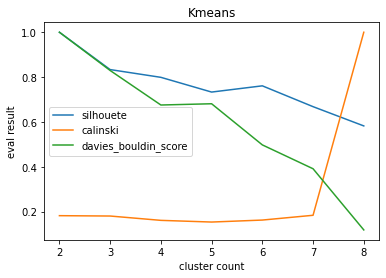

In [11]:
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,9):
        
        kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(clean_data_numpy)
        evaluation = evaluate_model(kmeans)
        if evaluation:
            results[0].append(evaluation["silhouete"])
            results[1].append(evaluation["calinski"])
            results[2].append(evaluation["davies_bouldin_score"])
            cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Kmeans')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

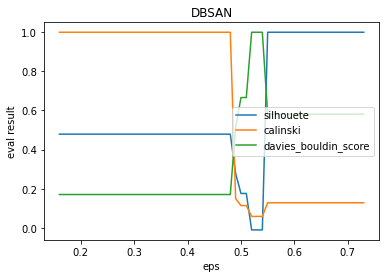

In [12]:
results = [[],[],[]]
eps_values = []
for eps in [x * 0.01 for x in range(1, 100)]:
        
    db = DBSCAN(eps=eps, min_samples=1,metric='euclidean').fit(clean_data_numpy)

    evaluation = evaluate_model(db)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        eps_values.append(eps)
        

results = [l / max(l) for l in results] # normalize result

plt.plot(eps_values,results[0], label = "silhouete")

plt.plot(eps_values, results[1], label = "calinski")

plt.plot(eps_values, results[2], label = "davies_bouldin_score")

plt.xlabel('eps')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('DBSAN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

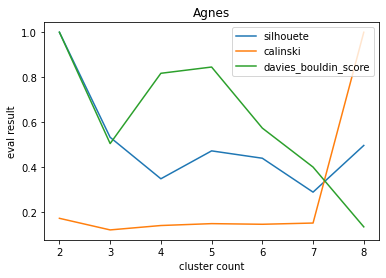

In [13]:
       
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,9):
        
    agnes = AgglomerativeClustering(n_clusters=cluster_number,affinity='euclidean',linkage='average').fit(clean_data_numpy)
    evaluation = evaluate_model(agnes)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Agnes')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(clean_data_numpy)

db = DBSCAN(eps=0.4, min_samples=2).fit(clean_data_numpy)
agnes = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average').fit(clean_data_numpy)

In [35]:
models = (agnes,kmeans , db)

for model in models:
    print_model_evaluations(model)


AgglomerativeClustering:
[('Kermanshah', 0), ('Qom', 0), ('Ahvaz', 1), ('Isfahan', 1), ('Karaj', 1), ('Mashhad', 1), ('Shiraz', 1), ('Tabriz', 1), ('Tehran', 1)]
silhouete : 0.309339212185482
calinski : 5.182661641302109
davies_bouldin_score : 0.9406871286109822

KMeans:
[('Isfahan', 0), ('Karaj', 0), ('Shiraz', 0), ('Tehran', 0), ('Ahvaz', 1), ('Kermanshah', 1), ('Mashhad', 1), ('Qom', 1), ('Tabriz', 1)]
silhouete : 0.26332814979548613
calinski : 5.513797256976524
davies_bouldin_score : 1.0560075133005724

DBSCAN:
[('Ahvaz', -1), ('Isfahan', -1), ('Kermanshah', -1), ('Mashhad', -1), ('Qom', -1), ('Shiraz', -1), ('Tabriz', -1), ('Karaj', 0), ('Tehran', 0)]
silhouete : 0.061744132352342426
calinski : 1.1317291671854959
davies_bouldin_score : 1.2549357682259428


In [22]:
def show_plot(labels):
    data_numpy_with_labels = np.concatenate((clean_data_numpy,np.array([labels]).T) , axis=1)
    pca = PCA(2)
    plot_df = pca.fit_transform(data_numpy_with_labels)
    plt.scatter(plot_df[:, 0], plot_df[:, 1], c=labels, s=50, cmap='viridis')

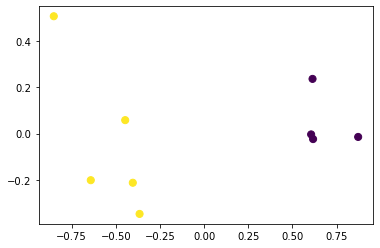

In [23]:
show_plot(kmeans.labels_)

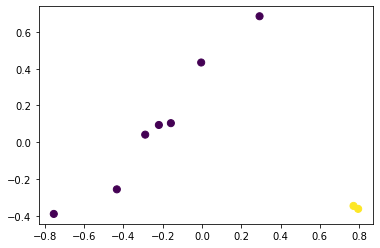

In [24]:
show_plot(db.labels_)

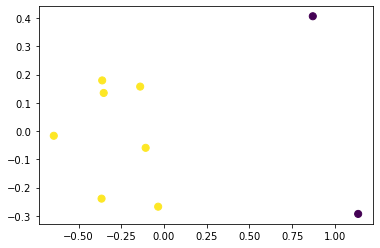

In [25]:
show_plot(agnes.labels_)